# Este notebook sirve de ejemplo para saber cómo python nos ayuda en el cálculo de órbitas.

In [2]:
# Installing packages

!pip install astroquery
!pip install poliastro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.1 MB/s eta 0:00:00


In [13]:
# Importing packages

import astropy
import astroquery
from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.plotting import OrbitPlotter2D
from astropy.time import Time
from poliastro.ephem import Ephem
from astropy.coordinates import solar_system_ephemeris

Esto grafica la órbita de la estación espacial internacional alrededor de la tierra.

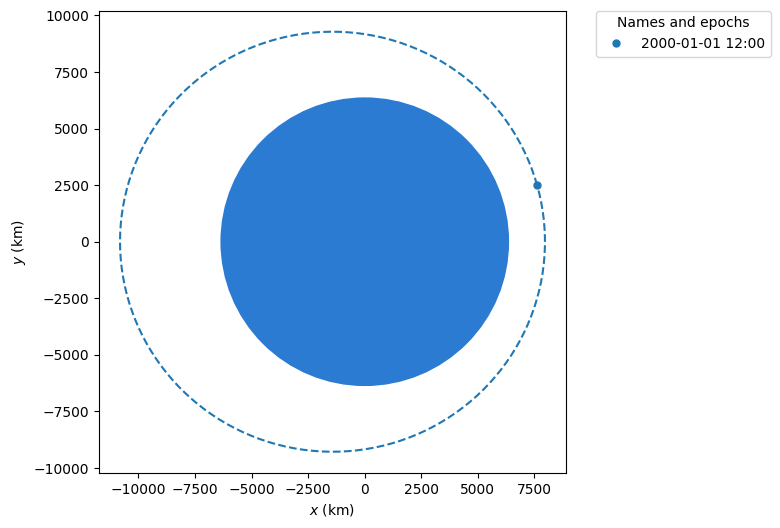

In [5]:
# Data from Curtis, example 4.3
# Podemos modificar los valores de velocidad
r = [-7000, -3000, 2500] * u.km
v = [-2, -2, -7] * u.km / u.s


# Se puede modificar el cuerpo al que se orbita: Sun (sol), Mars (Marte), Earth(Tierra)
ss = Orbit.from_vectors(Earth, r, v)
ss.plot()

Gráfica la órbita de un planeta alrededor del sol, con parámetros que se pueden incluir

In [6]:
# Data for Mars at J2000 from JPL HORIZONS

# Se pueden modificar estos valores
a = 3 * u.AU       # Longitud del semieje mayor
ecc = 0.2 * u.one         # Eccentricidad

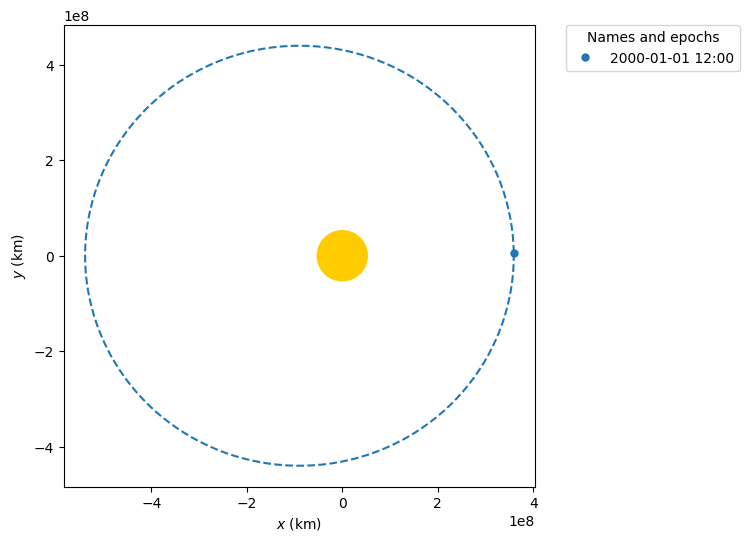

In [7]:
# Other values
inc = 100 * u.deg         # Inclinación
raan = 49.562 * u.deg     # Ascensión recta del nodo ascendente
argp = 2 * u.deg          # Argumento del pericentro
nu = 1 * u.deg            # Anomalía verdadera

# Plots the orbit
ss2 = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)
ss2.plot()

Make transfer orbits

In [8]:
# Se pueden modificar los valores morados
orb_i = Orbit.circular(Earth, alt=100000 << u.km)
hoh = Maneuver.hohmann(orb_i, 1000000 << u.km)

/usr/local/lib/python3.10/dist-packages/poliastro/core/maneuver.py:49: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  r_i = norm(r_i)


In [9]:
op = OrbitPlotter2D()
orb_a, orb_f = orb_i.apply_maneuver(hoh, intermediate=True)
op.plot(orb_i, label="Initial orbit")
op.plot(orb_a, label="Transfer orbit")
op.plot(orb_f, label="Final orbit")